Sizes: [100, 500, 1000, 2000, 4000, 5000]
Built-in solve times: [0.002076864242553711, 0.01268625259399414, 0.03962588310241699, 0.17275691032409668, 0.7702457904815674, 1.4557321071624756]
LU factorization times: [0.0014009475708007812, 0.010460853576660156, 0.03857088088989258, 0.1660149097442627, 0.8446986675262451, 1.5140178203582764]
LU solve times: [0.0007660388946533203, 0.0004949569702148438, 0.0018110275268554688, 0.0058290958404541016, 0.041380882263183594, 0.040049076080322266]


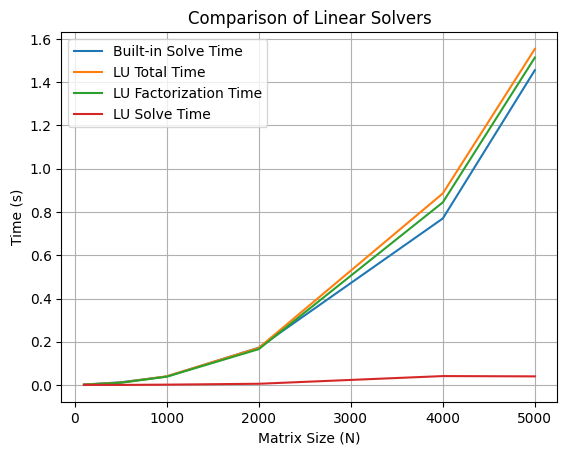

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as scila
import time

def driver():
    ''' Driver function to test different ways of solving a square linear system '''
    sizes = [100, 500, 1000, 2000, 4000, 5000]
    lu_times = []
    lu_solve_times = []
    built_in_times = []

    for N in sizes:
        # Create random matrix A and right-hand side b
        A = np.random.rand(N, N)
        b = np.random.rand(N, 1)

        # Measure time for built-in solver
        start = time.time()
        x_builtin = scila.solve(A, b)
        end = time.time()
        built_in_times.append(end - start)

        # Measure time for LU factorization
        start = time.time()
        P, L, U = scila.lu(A)
        end = time.time()
        lu_times.append(end - start)

        # Measure time for solving with LU
        start = time.time()
        y = scila.solve_triangular(L, np.matmul(P, b), lower=True)
        x_lu = scila.solve_triangular(U, y, lower=False)
        end = time.time()
        lu_solve_times.append(end - start)

    # Print results
    print("Sizes:", sizes)
    print("Built-in solve times:", built_in_times)
    print("LU factorization times:", lu_times)
    print("LU solve times:", lu_solve_times)

    # Plot results
    plt.plot(sizes, built_in_times, label="Built-in Solve Time")
    plt.plot(sizes, [lu_times[i] + lu_solve_times[i] for i in range(len(lu_times))], label="LU Total Time")
    plt.plot(sizes, lu_times, label="LU Factorization Time")
    plt.plot(sizes, lu_solve_times, label="LU Solve Time")
    plt.xlabel("Matrix Size (N)")
    plt.ylabel("Time (s)")
    plt.title("Comparison of Linear Solvers")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    driver()


In [2]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as scila
import time

def create_rect(N, M, smallest_entry=10**-1):
    ''' This subroutine creates an ill-conditioned rectangular matrix '''
    a = np.linspace(1, 10, M)
    d = 10 ** (-a)
    d[-1] = smallest_entry  # Adjust the smallest entry in d
    D2 = np.zeros((N, M))
    for j in range(0, M):
        D2[j, j] = d[j]
    ''' Create matrices needed to manufacture the low-rank matrix '''
    A = np.random.rand(N, N)
    Q1, R = la.qr(A)
    A = np.random.rand(M, M)
    Q2, R = la.qr(A)
    B = np.matmul(Q1, D2)
    B = np.matmul(B, Q2)
    return B

def normal_equation(A, b):
    ''' Solve Ax = b using the normal equation '''
    AtA = np.matmul(A.T, A)
    Atb = np.matmul(A.T, b)
    x = la.solve(AtA, Atb)
    return x

def qr_factorization(A, b):
    ''' Solve Ax = b using the QR factorization '''
    Q, R = la.qr(A, mode='reduced')
    Qb = np.matmul(Q.T, b)
    x = la.solve(R, Qb)
    return x

def validate_solution(A, b, x):
    ''' Validate the solution by checking the residual norm ||Ax - b|| '''
    residual = la.norm(np.matmul(A, x) - b)
    return residual

def driver():
    ''' Driver function to test normal equation and QR factorization techniques '''
    N, M = 10, 5
    smallest_entry = 10**-1  # Initial condition
    A = create_rect(N, M, smallest_entry)
    b = np.random.rand(N, 1)

    # Solve using normal equation
    start = time.time()
    x_normal = normal_equation(A, b)
    end = time.time()
    normal_time = end - start

    # Solve using QR factorization
    start = time.time()
    x_qr = qr_factorization(A, b)
    end = time.time()
    qr_time = end - start

    # Validate solutions
    residual_normal = validate_solution(A, b, x_normal)
    residual_qr = validate_solution(A, b, x_qr)

    # Print results
    print("Smallest entry in d:", smallest_entry)
    print("Normal equation residual:", residual_normal)
    print("QR factorization residual:", residual_qr)
    print("Normal equation time:", normal_time)
    print("QR factorization time:", qr_time)

    # Change smallest entry and repeat
    smallest_entry = 10**-10
    print("\nChanging smallest entry in d to:", smallest_entry)
    A = create_rect(N, M, smallest_entry)

    # Solve again with smaller entry
    x_normal = normal_equation(A, b)
    x_qr = qr_factorization(A, b)
    residual_normal = validate_solution(A, b, x_normal)
    residual_qr = validate_solution(A, b, x_qr)

    print("Smallest entry in d:", smallest_entry)
    print("Normal equation residual:", residual_normal)
    print("QR factorization residual:", residual_qr)
    print("Normal equation time:", normal_time)
    print("QR factorization time:", qr_time)

if __name__ == '__main__':
    driver()


Smallest entry in d: 0.1
Normal equation residual: 0.9787793552175669
QR factorization residual: 0.9787793547625491
Normal equation time: 0.000331878662109375
QR factorization time: 0.00010919570922851562

Changing smallest entry in d to: 1e-10
Smallest entry in d: 1e-10
Normal equation residual: 0.46923280335280726
QR factorization residual: 0.44224094684980036
Normal equation time: 0.000331878662109375
QR factorization time: 0.00010919570922851562
